In [36]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [37]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [38]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [39]:
X, y = mnist['data'], mnist['target']

In [40]:
import matplotlib.pyplot as plt

def show_digit(image_data: list) -> None:
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

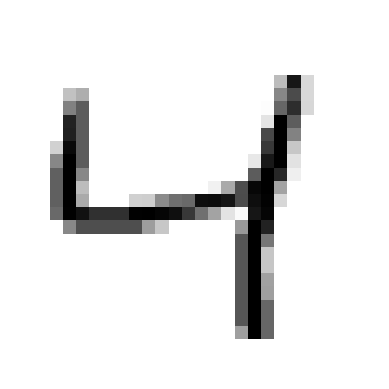

In [41]:
some_digit = X[2]
show_digit(some_digit)

In [42]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [43]:
# from sklearn.neighbors import KNeighborsClassifier
# 
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train)

In [44]:
# from sklearn.model_selection import cross_val_predict
# 
# y_train_knn_predict = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [45]:
# from sklearn.metrics import f1_score, precision_score, recall_score
# 
# f1 = f1_score(y_train, y_train_knn_predict, average='macro')
# precision = precision_score(y_train, y_train_knn_predict, average='macro')
# recall = recall_score(y_train, y_train_knn_predict, average='macro')


In [46]:
# print(f"F1 Score: {f1}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")

In [47]:
X = X / 255.0
print(X.min(), X.max())

0.0 1.0


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [49]:
param_grid = {
    'knn__n_neighbors': [3, 4, 5, 6],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [ ]:
from sklearn.model_selection import  GridSearchCV


grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
# print("Starting grid search...")
grid.fit(X_train, y_train)
# 
# print("Лучшие параметры:", grid.best_params_)
# print(f"Лучшая accuracy: {grid.best_score_:.4f}")


In [ ]:
# from sklearn.metrics import accuracy_score
# 
# 
# best_model = grid.best_estimator_
# y_test_predict = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_predict)
# print(f"Точность на тестовом наборе: {test_accuracy:.4f}")

In [ ]:
from scipy.ndimage import shift


def shift_image(image: list, dx: int, dy: int) -> list:
    image_to_28 = image.reshape(28, 28)
    shifted_image = shift(image_to_28, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape(-1)

X_train_large = [image for image in X_train]
y_train_large = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        shifted_image = shift_image(image, dx, dy)
        X_train_large.append(shifted_image)
        y_train_large.append(label)

In [ ]:
import numpy as np

X_train_large = np.array(X_train_large)
y_train_large = np.array(y_train_large)

shuffle_idx = np.random.permutation(len(X_train_large))
X_train_large = X_train_large[shuffle_idx]
y_train_large = y_train_large[shuffle_idx]


In [ ]:
knn_clf = KNeighborsClassifier(**grid.best_params_)
knn_clf.fit(X_train_large, y_train_large)
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy